# Паттерн Декоратор

Представьте себя ненадолго разработчиком компьютерной игры в стиле фэнтези. Вы будете прописывать систему эффектов, которые могут быть наложены на героя вашей игры.

У вас есть герой, который обладает некоторым набором характеристик. Враги и союзники могут накладывать на героя положительные и отрицательные эффекты. Эти эффекты каким-то образом изменяют характеристики героя. На героя можно накладывать бесконечно много эффектов, действие одинаковых эффектов суммируется. Игрок должен знать, какие положительные и какие отрицательные эффекты на него были наложены и в каком порядке.

Класс герой описан следующим образом (характеристики могут быть другими): 

In [1]:
class Hero:
    def __init__(self):
        self.positive_effects = []
        self.negative_effects = []
        
        self.stats = {
            "HP": 128,
            "MP": 42,
            "SP": 100,
            
            "Strength": 15,
            "Perception": 4,
            "Endurance": 8,
            "Charisma": 2,
            "Intelligence": 3,
            "Agility": 8,
            "Luck": 1
        } 
        
    def get_positive_effects(self):
        return self.positive_effects.copy()
    
    def get_negative_effects(self):
        return self.negative_effects.copy()
    
    def get_stats(self):
        return self.stats.copy()
        

Описывать класс героя в коде НЕ НУЖНО.

Вам нужно написать систему декораторов, представленную на UML-диаграмме:
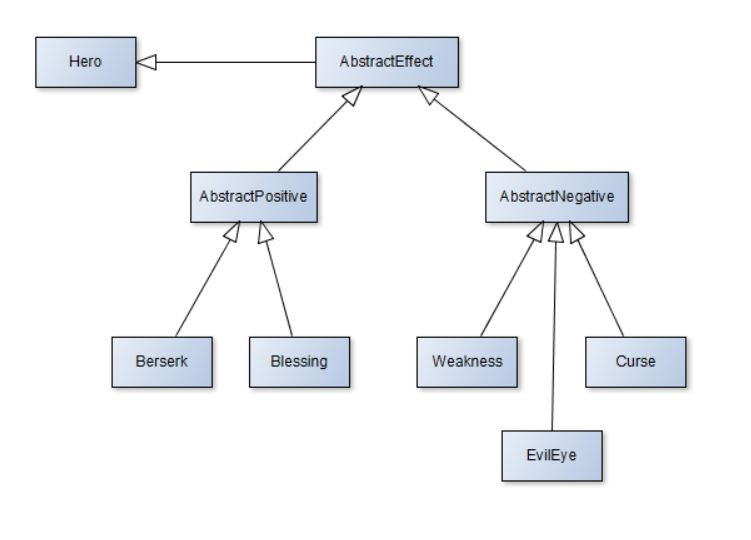
    
Названия наложенных положительных и отрицательных эффектов добавляются каждое в свой счетчик. Названия эффектов совпадают с названиями классов.

Описания эффектов:

    Берсерк — Увеличивает параметры Сила, Выносливость, Ловкость, Удача на 7; уменьшает параметры Восприятие, Харизма, Интеллект на 3. Количество единиц здоровья увеличивается на 50.
    Благословение — Увеличивает все основные характеристики на 2.
    Слабость — Уменьшает параметры Сила, Выносливость, Ловкость на 4.
    Сглаз — Уменьшает параметр Удача на 10.
    Проклятье — Уменьшает все основные характеристики на 2.

К основным характеристикам относятся Сила (Strength), Восприятие (Perception), Выносливость (Endurance), Харизма (Charisma), Интеллект (Intelligence), Ловкость (Agility), Удача (Luck).

При выполнении задания учитывайте, что:

    Изначальные характеристики базового объекта не должны меняться.
    Изменения характеристик и накладываемых эффектов (баффов/дебаффов) должно происходить динамически, то есть при запросе get_stats, get_positive_effects, get_negative_effects
    Абстрактные классы AbstractPositive, AbstractNegative и соответственно их потомки могут принимать любой параметр base при инициализации объекта (_ _ init _ _ (self, base))
    Проверяйте, что эффекты корректно снимаются, в том числе и из середины стека

In [3]:
from abc import ABC, abstractmethod

In [109]:
class AbstractEffect(Hero, ABC):
    def __init__(self, base):
        super().__init__()
        self.base = base

    @abstractmethod
    def get_stats(self):
        return self.base.get_stats.copy()

    def get_positive_effects(self):
        return self.base.get_positive_effects()

    def get_negative_effects(self):
        return self.base.get_negative_effects()

In [110]:
class AbstractPositive(AbstractEffect):
    def get_positive_effects(self):
        positive_effects = self.base.get_positive_effects()
        positive_effects.append(self.__class__.__name__)
        return positive_effects    

    
class AbstractNegative(AbstractEffect):
    def get_negative_effects(self):
        negative_effects = self.base.get_negative_effects()
        negative_effects.append(self.__class__.__name__)
        return negative_effects

In [112]:
class Berserk(AbstractPositive):
    """Берсерк — Увеличивает параметры Сила, Выносливость, Ловкость, Удача на 7; 
    уменьшает параметры Восприятие, Харизма, Интеллект на 3.
    Количество единиц здоровья увеличивается на 50."""
    
    def get_stats(self):
        stats = self.base.get_stats()
        keys_up = ['Strength', 'Endurance', 'Agility', 'Luck']
        keys_down = ['Perception', 'Charisma', 'Intelligence']
        for key in keys_up:
            stats[key] += 7
        for key in keys_down:
            stats[key] -= 3
        stats['HP'] += 50
        return stats        
        
        
class Blessing(AbstractPositive):
    """Благословение — Увеличивает все основные характеристики на 2.
    К основным характеристикам относятся Сила (Strength), Восприятие (Perception), 
    Выносливость (Endurance), Харизма (Charisma), Интеллект (Intelligence), Ловкость (Agility), Удача (Luck)."""
    
    def get_stats(self):
        stats = self.base.get_stats()
        keys = ['Strength', 'Perception', 'Endurance', 'Charisma', 'Intelligence', 'Agility', 'Luck']
        for key in keys:
            stats[key] += 2
        return stats
          

class Weakness(AbstractNegative):
    """Слабость — Уменьшает параметры Сила, Выносливость, Ловкость на 4."""
    def get_stats(self):
        stats = self.base.get_stats()
        keys = ['Strength', 'Endurance', 'Agility']
        for key in keys:
            stats[key] -= 4
        return stats
    
    
class EvilEye(AbstractNegative):
    """Сглаз — Уменьшает параметр Удача на 10."""
    def get_stats(self):
        stats = self.base.get_stats()
        stats["Luck"] -= 10
        return stats


class Curse(AbstractNegative):
    """Проклятье — Уменьшает все основные характеристики на 2."""
    def get_stats(self):
        stats = self.base.get_stats()
        keys = ['Strength', 'Perception', 'Endurance', 'Charisma', 'Intelligence', 'Agility', 'Luck']
        for key in keys:
            stats[key] -= 2
        return stats



In [113]:
hero = Hero()

In [114]:
berserk = Berserk(hero)
berserk.get_positive_effects()


['Berserk']

In [115]:
berserk.get_stats()

{'Agility': 15,
 'Charisma': -1,
 'Endurance': 15,
 'HP': 178,
 'Intelligence': 0,
 'Luck': 8,
 'MP': 42,
 'Perception': 1,
 'SP': 100,
 'Strength': 22}

In [116]:
blessing = Blessing(berserk)
blessing.get_positive_effects()
blessing.get_stats()

{'Agility': 17,
 'Charisma': 1,
 'Endurance': 17,
 'HP': 178,
 'Intelligence': 2,
 'Luck': 10,
 'MP': 42,
 'Perception': 3,
 'SP': 100,
 'Strength': 24}

In [117]:
blessing.get_positive_effects()

['Berserk', 'Blessing']

In [118]:
curse = Curse(blessing)

In [120]:
curse.get_positive_effects()

['Berserk', 'Blessing']

In [122]:
curse.get_stats()

{'Agility': 15,
 'Charisma': -1,
 'Endurance': 15,
 'HP': 178,
 'Intelligence': 0,
 'Luck': 8,
 'MP': 42,
 'Perception': 1,
 'SP': 100,
 'Strength': 22}